<a href="https://colab.research.google.com/github/onnnnn/INTRODUCTION-AND-PRACTICUM-OF-DEEP-LEARNING-IN-MACHINE-LEARNING/blob/main/Mid_Term.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>本人承諾在本次考試，我不會靠別人的幫助完成作答。

# Question 1 （簡答題，請不要完全抄PPT的内容，用自己的話寫（全抄我會扣分）。可以適當的用例子説明，精簡就好，但盡量讓我知道你確實的掌握了這個概念）

1.   簡述 監督式學習（Supervised Learning）與 非監督式學習（Unsupervised Learning）的差異。

2.   試以Parametric Modelling PPT的第119頁的圖，簡述 Bias-Variance Tradeoff （Bias 和 Variance各指什麽）并説明其在機器學習造模方法的選擇及考量上的重要性。
（我們在作業中曾經有舉過什麽例子來看到這一現象嗎（可能是透過兩個模型的在training set 和testing set的表現比較）？）

3.   試以Parametric Modelling PPT的第132及139及頁的圖，簡述 正則化（Regularization）在於建模時的作用。（爲何要對模型參數進行限制？爲什麽不選擇理論最低誤差的參數組合？）

###### 1. 
**監督式學習**：給定的資料已有標示正確類別（label），模型以此進行「學習」/「訓練」。

一般是各種參數組合而成的函數，模型的訓練目標就是要找出一個最能夠縮小預測值與真實值的預測誤差的函數（最佳函數）。

在訓練過程中挑選最能表示從訓練資料的特徵到預測目標的最佳函數。

在測試階段則根據測試資料的特徵和學習到的函數，來產生預測結果。

**非監督式學習**：給定的資料並沒有標示正確類別。

一般是根據觀察值彼此之間的距離（有著不一樣的距離計算方式）來進行分類（/分群）。

###### 2.
bias（偏差），variance（變異），在模型的效能中對 bias 和 variance 進行取捨。

可以用來衡量當用不同組的訓練資料時，重新訓練模型很多次，會發生的結果。

ex. 當不論用哪一組訓練資料時，都會出現很多的錯誤，就表示有較高的 bias。

ex. 不過任意不同組隨機選擇的訓練資料，應該要得到差不多的結果（～相似平均值），我們就會說模型具有比較低的 variance。

high bias & low variance 一般對應到 under fitting；low bias & high variance 一般對應到 over fitting。

當模型的 bias 很高（用訓練資料時的表現也差），就可以試著塞多一點 features；當模型的 variance 很高的時候，就試著減少一些 features。

在 HW1 的第二大題中可以看到當 features 增加，r-squared 也提高（模型越精準，回歸效果越顯著）；mse 減少（資料變異程度低）

###### 3.
一般在訓練模型時所用的 features 越多，越有可能出現 over fitting 的情況，而且當非零的係數很多時，模型的解釋能力就很低。

因此我們在誤差項裡面加入懲罰項：當 beta 越大，懲罰項也會越大。盡量取誤差和懲罰項結合後，最小化的結果（懲罰項越重要，那就越不容易得到比較大的beta值）

# Question 2 （Data Visualization + Logistic Regression）

請以以下程式讀取檔案裏的`SleepStudyData.csv`

```
df = pd.read_csv("SleepStudyData.csv")
```

1.    請以底綫`('_')`取代變項名稱的空格`(' ')`

2.    請對`Enough`, `Phone_Reach`, `Phone_Time`, `Breakfast`進行Dummy coding。（"Yes" 為 1，"No" 為 0）

3.    請檢查資料集有無缺失值，並回報有缺失值的變項名稱。進入下一小題之前請將有缺失值的樣本從資料集中清除。

4.    請回報在不同的 `Hours` 之下，不同 `Tired` 程度的人數。（Hint:`pd.crosstab()`）。試以`sns.heatmap`的形式呈現結果。

5.    以所有變項（除了`Enough`）預測`Enough`，建立一 Logistic Regression 分類模型，這次不需要將資料集分 training 和 testing set。（記得先將`Enough`設定爲類別變項。）

6.    回報模型的 Accuracy 和 AUC score。

In [ ]:
import pandas as pd
df = pd.read_csv("SleepStudyData.csv")
df.head(1)

,Enough,Hours,Phone Reach,Phone Time,Tired,Breakfast
0,Yes,8.0,Yes,Yes,3,Yes


In [ ]:
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['Enough', 'Hours', 'Phone_Reach', 'Phone_Time', 'Tired', 'Breakfast'], dtype='object')

In [ ]:
cols_to_dummy = ['Enough', 'Phone_Reach', 'Phone_Time', 'Breakfast']
for col in cols_to_dummy:
    df[col] = df[col].replace({'Yes': 1, 'No': 0})
df.head()

,Enough,Hours,Phone_Reach,Phone_Time,Tired,Breakfast
0,1,8.0,1,1,3,1
1,0,6.0,1,1,3,0
2,1,6.0,1,1,2,1
3,0,7.0,1,1,4,0
4,0,7.0,1,1,2,1


In [ ]:
for col_name, count_nan in zip(df.columns, df.isna().sum()):
    if count_nan != 0:
        print(f'column {col_name} has {count_nan} nan values')

column Hours has 2 nan values


In [ ]:
df = df.dropna()
assert len(df) == 102

<AxesSubplot:xlabel='Tired', ylabel='Hours'>

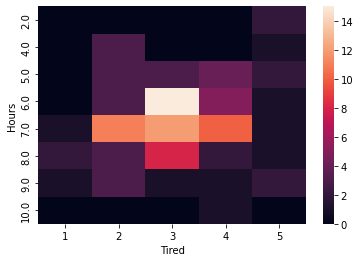

In [ ]:
import seaborn as sns
sns.heatmap(pd.crosstab(df.Hours, df.Tired))

In [ ]:
x = df.loc[:,'Hours':'Breakfast']
y = df['Enough']

In [ ]:
from sklearn import linear_model, metrics, preprocessing, model_selection
lr_sklearn = linear_model.LogisticRegression()
lr_fitted_sklearn = lr_sklearn.fit(x, y.values)

In [ ]:
y_hat_train = lr_fitted_sklearn.predict(x)
y_prob_train = lr_fitted_sklearn.predict_proba(x)
print('  + accuracy: %.2f' % metrics.accuracy_score(y, y_hat_train))
print('  + area under ROC: %.2f' % metrics.roc_auc_score(y, y_prob_train[:,1]))

  + accuracy: 0.80
  + area under ROC: 0.82


# Question 3 （Lasso Regression）

請執行以下程式碼讀取sklearn的資料集。這是波士頓的房價的資料集。
```
from sklearn.datasets import load_boston
boston = load_boston()
```
x: `boston.data`

y: `boston.target`, 為波士頓的房價

x的變項名稱為: `boston.feature_names`

1.    請問`boston.data`有多少筆資料，共有幾個變項。

2.    請以`train_test_split`將資料分爲 training 和 testing set，test_size 設爲0.3。

3.    請為x和y建立一個 Lasso Regression 模型。請自行設定合理的 alphas_grid 區間對模型進行 5—fold Cross Validation，繪出 Line chart 選定模型表現最好的 alpha，並確切回報 alpha_best 的數值。

4.    以`matplotlib`將模型回歸係數大小視覺化。

5.    以 testing set 檢定模型表現，回報 training 和 testing set 的 MSE 和 R-square 值。

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()

/Users/zionn/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the 

In [ ]:
x = boston.data
y = boston.target

In [ ]:
num_data, num_features = boston.data.shape
print(f'boston.data has {num_data} data, {num_features} features')

boston.data has 506 data, 13 features


In [ ]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.3, random_state = 48)

In [ ]:
import numpy as np
alphas_grid = np.logspace(-100, 100, num = 100)
lasso_cv = linear_model.LassoCV(alphas = alphas_grid, fit_intercept = True, normalize = True, max_iter = 1000, tol = 0.001, cv = 5, random_state = 48)

In [ ]:
lasso_cv_fitted = lasso_cv.fit(x, y)

/Users/zionn/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4353.3106935697115, tolerance: 39.19148542079209
  model = cd_fast.enet_coordinate_descent_gram(
/Users/zionn/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4957.951732110099, tolerance: 39.19148542079209
  model = cd_fast.enet_coordinate_descent_gram(
/Users/zionn/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4966.981178713765, tolerance: 39.19148542079209
  model = cd_fast.enet_coordinate_descent_gram(
/Users/zionn/opt/anacond

/Users/zionn/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4604.280841986481, tolerance: 34.80910444444445
  model = cd_fast.enet_coordinate_descent_gram(
/Users/zionn/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4604.280842055912, tolerance: 34.80910444444445
  model = cd_fast.enet_coordinate_descent_gram(
/Users/zionn/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4604.280842056449, tolerance: 34.80910444444445
  model = cd_fast.enet_coordinate_descent_gram(
/Users/zionn/opt/anaconda

In [ ]:
alpha_best = lasso_cv_fitted.alpha_
alpha_best

0.0009326033468832181

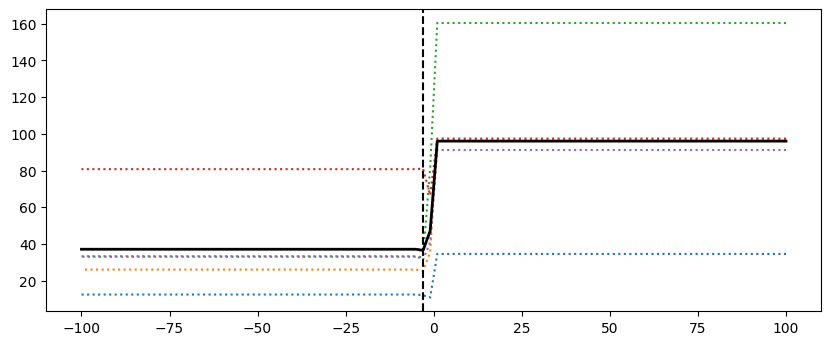

In [ ]:
import matplotlib.pyplot as plt
log_alphas_grid = np.log10(lasso_cv_fitted.alphas_)
ax = plt.figure(figsize = (10, 4), dpi = 100)
ax = plt.plot(log_alphas_grid, lasso_cv_fitted.mse_path_, ':')
ax = plt.plot(log_alphas_grid, lasso_cv_fitted.mse_path_.mean(axis = -1), 'k', label = 'Average across the folds', linewidth = 2)
ax = plt.axvline(np.log10(alpha_best), linestyle = '--', color = 'k', label = 'alpha: CV estimate')

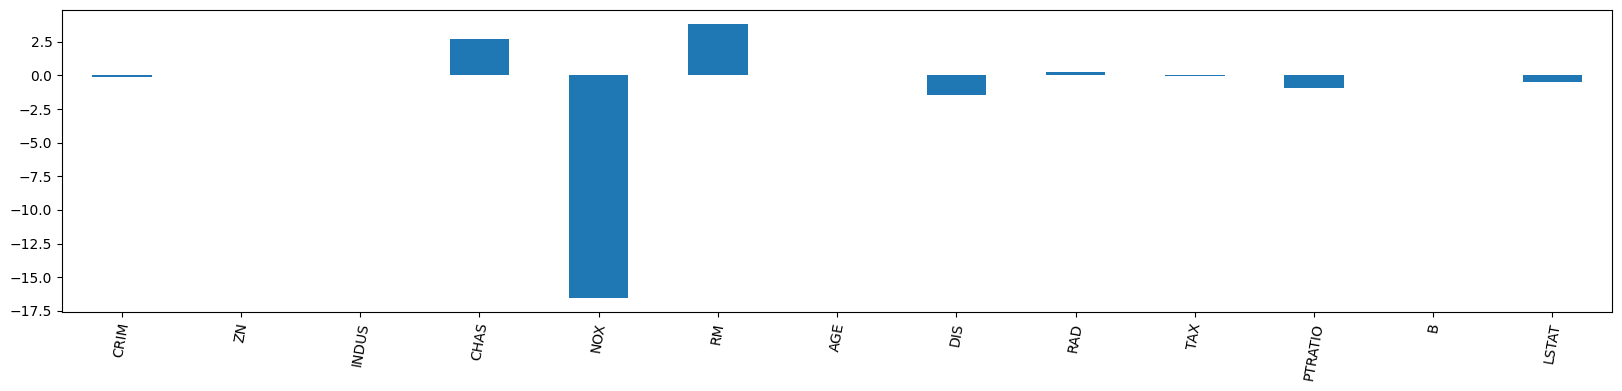

In [ ]:
plt.figure(figsize=(20, 4), dpi = 100)
ax = pd.Series(lasso_cv_fitted.coef_, index=boston.feature_names).plot.bar(rot = 80)

# Question 4 （最大概似法）

Julius 最近喜歡搜集寶可夢卡牌，常常到勝利校區附近的一家玩具店買卡。

他特別喜歡水系寶可夢（可愛到炸~），想知道玩具店裏的卡牌裏水系的寶可夢的概率是多少。

他用辛苦賺來的錢 **隨機** 買了**100張卡牌，有27張是水系**的寶可夢。

假設卡牌中 **是水系寶可夢的概率p** 服從於二項分佈（公式有需要就自己google）。

很明顯，我應該會認爲 p = 27/100

但我希望你能**用最大概似的概念解釋我爲什麽會這麽認爲** p = 27/100。（爲什麽是 27/100 而不是 72/100, 87/100 ......?）

你可以簡單地以數學式表達（不要求你用latex寫）。

（Hint：可以參考Parametric Modelling PPT pg. 55）

###### ans
假設資料 v1,...,vn 的分佈會受到某個未知參數 theta 的影響：p(v1,...,vn|theta)

theta的可能性應該是：L(theta|v1,...,vn)

theta 最有可能的值，就是讓這個可能性函數最大化（最有可能產生出觀察資料的值）

在連續分佈中，可以知道機率分佈函數

而我們一般假設回歸誤差會呈現常態分佈，平均值是0，整組資料整體的可能性，就是每個個別可能性的乘積。

如果選擇的 alpha，beta值可以讓誤差平方和得到最小的結果，那應該可以對應到可能行最大的時候。